In [1]:
# Bibliotheken importieren
import numpy
import scipy.special # für die Sigmoid-Fkt. expit()
import matplotlib.pyplot # für die grafische Ausgabe von arrays
import imageio # um Daten aus Bilddateien einlesen zu können
# damit die Plots innerhalb dieses Notebooks angezeigt werden
%matplotlib inline


# Definition der Klasse neuralNetwork
class neuralNetwork:
    
    # das neurale Netz initialisieren
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Anzahl der Knoten in jeder Schicht (Layer) festlegen (input, hidden, output)
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # die Lernrate
        self.lr = learningrate
        
        # die Gewichtsmatrizen wih und who erzeugen
        # die Gewichte in den Matrizen sind w_i_j wobei von Knoten i zu Knoten j im nächsten Layer verlinkt wird
        self.wih = (numpy.random.rand(self.hnodes, self.inodes)-0.5)
        self.who = (numpy.random.rand(self.onodes, self.hnodes)-0.5)
        
        # die Aktivierungsfunktion definieren als sigmoid-Fkt
        self.activation_function = lambda x: scipy.special.expit(x)
    
        pass
    
    
    # das neuronale Netz trainieren
    def train(self, inputs_list, targets_list):
        # Listen in 2D-array konvertieren
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Eingangssignale in hidden layer berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Ausgangssignale aus hidden layer berechnen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Eingangssignale in finalem output layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Ausgangssignale aus finalem output layer berechnen
        final_outputs = self.activation_function(final_inputs)
        
        # Fehler des output layers ist (targets - aktuell)
        output_errors = targets - final_outputs
        
        # Fehler des hidden layers erhält man durch Backpropagierung: die output_errors werden
        # entsprechend der Gewichte aufgeteilt und für die Knoten des hidden layers zusammengefasst
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # die Gewichte zwischen hidden und output layer aktualisieren
        self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                         (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # die Gewichte zwischen input und hidden layer aktualisieren
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * 
                                         (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    
    # das neuronale Netz abfragen
    def query(self, inputs_list):
        # Eingabeliste in 2D-array konvertieren
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # Eingangssignale in hidden layer berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Ausgangssignale aus hidden layer berechnen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Eingangssignale in finalem output layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Ausgangssignale aus finalem output layer berechnen
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
# Anzahl der Knoten für die drei Schichten
input_nodes = 784 # da handgeschriebene Zeichen aus 28x28 Pixelwerten bestehen
hidden_nodes = 100 # da das ein Wert zwischen input_nodes und output_nodes ist
output_nodes = 10 # da 10 Ziffern

# Lernrate
learning_rate = 0.2

# Instanz eines Netzwerks erzeugen
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
# das neuronale Netz trainieren mit den MNIST Trainingsdaten

# die MNIST Trainingsdaten laden
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# epochs ist die Anzahl der Durchläufe, in denen der Trainingsdatensatz zum Trainieren benutzt wird
epochs = 2

for e in range(epochs): 
    # durch alle Datensätze ("record") im Trainingsdatensatz durchgehen
    for record in training_data_list:
        # Zahlen zwischen den Kommas auslesen
        all_values = record.split(',')
        # Eingangsdaten in den Bereich 0.01 bis 1.0 skalieren, damit sie im optimalen Bereich der Aktivierungsfkt. liegen
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99+0.01)
        # Zielarray aufbereiten für die Ausgabeknoten
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] enthält das Label (die dargestellte Ziffer)
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass


[[0.07756934]
 [0.01093302]
 [0.23165764]
 [0.18896279]
 [0.02034896]
 [0.27657901]
 [0.07570655]
 [0.01479102]
 [0.35570912]
 [0.16056296]]
Das Netz sagt, das ist eine 8


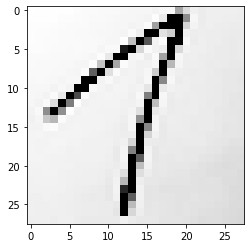

In [4]:
# das neuronale Netz mit eigenen Bildern testen

# eigenes Bild einlesen, das unter dem Namen ziffer.png vorliegt
img_array = imageio.imread('ziffer.png', as_gray=True)

# 28x28-array in eine Werteliste überführen
img_data = 255.0 - img_array.reshape(784)
#img_data = img_array.reshape(784)

# Eingangsdaten in den Bereich 0.01 bis 1.0 skalieren, damit sie im optimalen Bereich der Aktivierungsfkt. liegen
img_data = (img_data/255.0*0.99) + 0.01

inputs = img_data

# das Netz abfragen
outputs = n.query(inputs)
print(outputs)

# der Index des höchsten Wertes gehört zu dem Label
label = numpy.argmax(outputs)

# Bild und Ergebnis ausgeben
matplotlib.pyplot.imshow(255.0 - img_array,cmap='Greys',interpolation='None')
#matplotlib.pyplot.imshow(img_array,cmap='Greys',interpolation='None')
print("Das Netz sagt, das ist eine", label)


In [11]:
# das neuronale Netz mit MNIST testen

# die MNIST Testdaten laden
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# Trefferliste anlegen um zu überprüfen, wie gut das Netz funktioniert
scorecard = []

# durch alle Datensätze ("record") im Testdatensatz durchgehen
for record in test_data_list:
   # Zahlen zwischen den Kommas auslesen
    all_values = record.split(',')
    # die richtige Antwort ist die erste Ziffer
    correct_label = int(all_values[0])
    #print(correct_label, "richtige Ziffer")
    # Eingangsdaten in den Bereich 0.01 bis 1.0 skalieren, damit sie im optimalen Bereich der Aktivierungsfkt. liegen
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99+0.01) 
    # das Netz abfragen
    outputs = n.query(inputs)
    # der Index des höchsten Wertes gehört zu dem Label
    label = numpy.argmax(outputs)
    #print(label, "Antwort des Netzes")
    # richtig oder falsch an die Trefferliste anhängen
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

# Trefferquote berechnen und ausgeben
scorecard_array = numpy.asarray(scorecard)
print("Trefferquote = ", scorecard_array.sum()/scorecard_array.size)

Trefferquote =  0.9578
